## Supervised models
This notebook is intended for giving an introduction the ML supervised models that can be used for Covid detection.

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
# Auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

<img src="../images/Supervised_Models.png" width="800"/>

## Loading packages and dependencies

In [3]:
from src.preprocessing.image_augmentor import generate_augmented_images_masks, get_image_mask_pairs
from src.models.build_model import train_advanced_supervised_model, evaluate_model
from src.visualization.visualizer import show_grad_cam_cnn, get_predication_output,show_loss_accuracy_report, show_confusion_matrix_report

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/dataset/images'
masks_data_dir = '../data/raw/dataset/predicted_masks'
store_images_dir = '../reports/images/grad_cam'
IMG_SIZE = 256  # Resize images to IMG_SIZExIMG_SIZE pixels
batch_size = 32

## Extracting features from images

In [4]:
classes = ['COVID','NORMAL','Viral Pneumonia','Lung_Opacity'] # Adjust to your actual folder names

In [5]:
image_paths, mask_paths, labels = get_image_mask_pairs(raw_data_dir, masks_data_dir, classes)

In [6]:
from sklearn.model_selection import train_test_split

train_img, val_img, train_mask, val_mask, train_lbl, val_lbl = train_test_split(
    image_paths, mask_paths, labels, test_size=0.2, random_state=42
)

In [43]:
# Update the generator to use one-hot encoded labels
train_data, val_data, class_weight_dict = generate_augmented_images_masks(train_img, val_img, train_mask, val_mask, train_lbl, val_lbl, classes)

Class weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


## Training and evaluating models

### Convolutional Neural Networks (CNN)

✅ Strengths:
* Highly accurate for image tasks.
* Learns complex patterns automatically.
* Works well with large image datasets.

❌ Weaknesses:
* Computationally expensive (needs GPUs).
* Requires large labeled datasets.
* Not easily interpretable.

In [8]:
# Train the model
cnn_model, cnn_history = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, n_channels=2, model_type='CNN', classification_type='categorical')

2025-04-14 16:04:49.828969: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-14 16:04:49.829001: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-04-14 16:04:49.829005: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-04-14 16:04:49.829023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-14 16:04:49.829034: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 2)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 256, 256, 2)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 2)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             

 Total params: 19,447,332 (74.19 MB)

 Trainable params: 19,439,396 (74.16 MB)

 Non-trainable params: 7,936 (31.00 KB)

/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2025-04-14 16:04:52.809568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


530/530 ━━━━━━━━━━━━━━━━━━━━ 301s 552ms/step - accuracy: 0.4398 - loss: 37.7463 - val_accuracy: 0.2776 - val_loss: 83.8693 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 320s 603ms/step - accuracy: 0.5679 - loss: 45.3247 - val_accuracy: 0.7510 - val_loss: 19.7032 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 305s 576ms/step - accuracy: 0.6403 - loss: 49.7059 - val_accuracy: 0.6140 - val_loss: 47.6865 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 306s 577ms/step - accuracy: 0.7253 - loss: 51.7324 - val_accuracy: 0.7451 - val_loss: 42.4079 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 305s 576ms/step - accuracy: 0.7414 - loss: 60.7644 - val_accuracy: 0.8361 - val_loss: 41.3957 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 307s 580ms/step - accuracy: 0.7682 - loss: 59.6512 - val_accuracy: 0.8573 - val_loss: 39.8389 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━

In [44]:
cnn_train_loss, cnn_train_acc = cnn_history.history['loss'][-1], cnn_history.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc:.4f}, Train Loss: {cnn_train_loss:.4f}")

cnn_test_loss, cnn_test_acc = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for images with masks", cnn_model, val_data, _, n_channels=2, model_type="CNN", classification_type="multiclass", history=cnn_history)
print(f"Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")

Train Accuracy: 0.7743, Train Loss: 67.5089


/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.7439 - loss: 20.0984
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/14 17:46:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 3


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/256036775927951482/runs/df76e3a00bdb4438ab815222a8867297
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.7510, Test Loss: 19.7032


Created version '3' of model 'tensorflow-CNN-multiclass'.


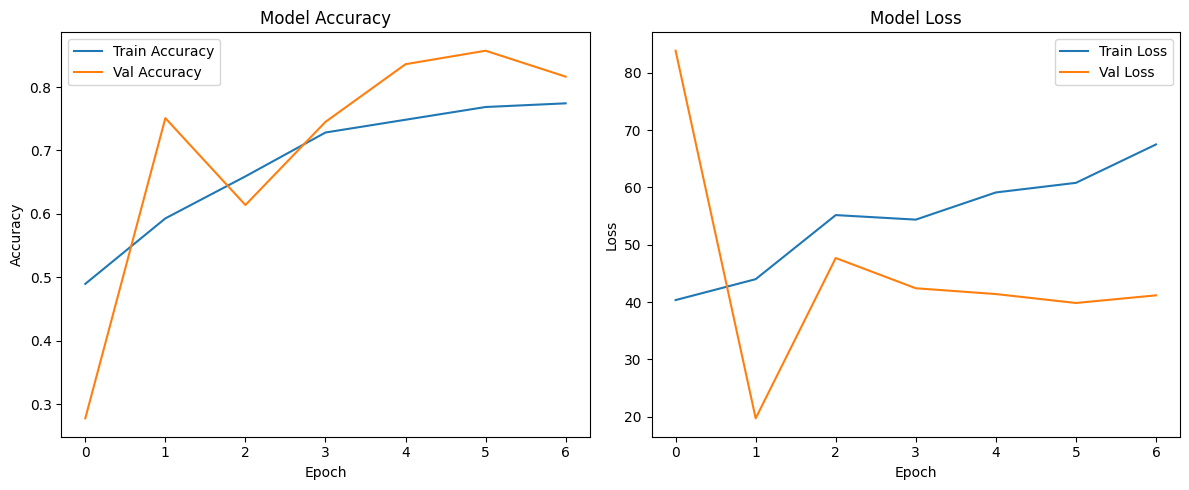

In [45]:
show_loss_accuracy_report(cnn_history)

In [47]:
show_confusion_matrix_report(cnn_model, val_data, n_channels=2)

133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step
[[177 315  45 164]
 [502 933 181 469]
 [ 69 114  28  61]
 [282 538 104 251]]
              precision    recall  f1-score   support

           0       0.17      0.25      0.20       701
           1       0.49      0.45      0.47      2085
           2       0.08      0.10      0.09       272
           3       0.27      0.21      0.24      1175

    accuracy                           0.33      4233
   macro avg       0.25      0.25      0.25      4233
weighted avg       0.35      0.33      0.34      4233



In [71]:
for x, y in val_data:
    images = x
    labels = y
    break

Show prediction results for random images.

In [50]:
display(get_predication_output(images[:4], cnn_model, classes, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,image,confidence,predicted_class,actual_class
0,0,100.0,NORMAL,NORMAL
1,1,100.0,NORMAL,NORMAL
2,2,100.0,COVID,COVID
3,3,100.0,Lung_Opacity,Viral Pneumonia
